In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
import itertools


pdata = pd.read_csv("../Data/preprocessed_incl_steplength.csv")
pdata = pdata.drop(["Unnamed: 0.1"], axis=1)
pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
pdata

TestID  Conditie  SubjectID  SegmentNr WalkingDirection  \
0    006A01'         0          6          1             away   
1    006A01'         0          6          2          towards   
2    006A01'         0          6          3             away   
3    006A01'         0          6          4          towards   
4    009A01'         0          9          1             away   
5    009A01'         0          9          2          towards   
6    009A01'         0          9          3             away   
7    009A01'         0          9          4          towards   
8    010A01'         0         10          1             away   
9    010A01'         0         10          2          towards   
10   010A01'         0         10          3             away   
11   010A01'         0         10          4          towards   
12   011A01'         0         11          1             away   
13   011A01'         0         11          2          towards   
14   011A01'         0         11          3             away   
15   011A01'         0         11          4          towards   
16   013A01'         0         13          1             away   
17   013A01'         0         13          2          towards   
18   013A01'         0         13          3             away   
19   013A01'         0         13          4          towards   
20   014A01'         0         14          1             away   
21   014A01'         0         14          2          towards   
22   014A01'         0         14          3             away   
23   014A01'         0         14          4          towards   
24   015A01'         0         15          1             away   
25   015A01'         0         15          2          towards   
26   015A01'         0         15          3             away   
27   015A01'         0         15          4          towards   
28   016A01'         0         16          1             away   
29   016A01'         0         16          2          towards   
..       ...       ...        ...        ...              ...   
690  195B01'         1        195          3             away   
691  195B01'         1        195          4          towards   
692  197B01'         1        197          1             away   
693  197B01'         1        197          2          towards   
694  197B01'         1        197          3             away   
695  197B01'         1        197          4          towards   
696  205B01'         1        205          1             away   
697  205B01'         1        205          2          towards   
698  205B01'         1        205          3             away   
699  205B01'         1        205          4          towards   
700  208B01'         1        208          1             away   
701  208B01'         1        208          2          towards   
702  208B01'         1        208          3             away   
703  208B01'         1        208          4          towards   
704  209B01'         1        209          1             away   
705  209B01'         1        209          2          towards   
706  209B01'         1        209          3             away   
707  209B01'         1        209          4          towards   
708  210B01'         1        210          1             away   
709  210B01'         1        210          2          towards   
710  210B01'         1        210          3             away   
711  210B01'         1        210          4          towards   
712  211B01'         1        211          1             away   
713  211B01'         1        211          2          towards   
714  211B01'         1        211          3             away   
715  211B01'         1        211          4          towards   
716  213B01'         1        213          1             away   
717  213B01'         1        213          2          towards   
718  213B01'         1        213          3             away   
719  213B01'         1        213        

In [2]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    Xtrain = training.drop(['Conditie', 'SubjectID'], axis=1)
    Ytrain = training['Conditie']
    Xtrain = Xtrain.astype(float)
    Ytrain = Ytrain.astype(int)
    
    Xval = validation.drop(['Conditie', 'SubjectID'], axis=1)
    Yval = validation['Conditie']
    Xval = Xval.astype(float)
    Yval = Yval.astype(int)
    return Xtrain, Xval, Ytrain, Yval

collist =  ['SubjectID', 'Conditie', 'Som_afstand', 'AverageStepLength']
Xtrain, Xval, Ytrain, Yval = get_split_data(pdata, collist , 0.7)

In [3]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01)  
classifier.fit(Xtrain, Ytrain)  
y_pred = classifier.predict(Xval) 

In [4]:
print(classification_report(Yval, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.80      0.83       112
          1       0.82      0.87      0.84       112

avg / total       0.84      0.83      0.83       224



Confusion matrix, without normalization
[[90 22]
 [15 97]]


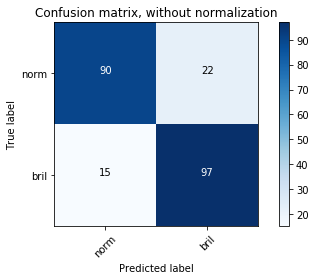

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(Yval, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')

In [6]:
clf = classifier.fit(Xtrain, Ytrain)  
tree.export_graphviz(clf, out_file='tree.dot', feature_names = collist[2:], class_names= ['norm', 'bril'], filled=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [7]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    Xtrain = training.drop(['Conditie', 'SubjectID'], axis=1)
    Ytrain = training['Conditie']
    Xtrain = Xtrain.astype(float)
    Ytrain = Ytrain.astype(int)
    
    Xval = validation.drop(['Conditie', 'SubjectID'], axis=1)
    Yval = validation['Conditie']
    Xval = Xval.astype(float)
    Yval = Yval.astype(int)
    
    classifier = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01)  
    classifier.fit(Xtrain, Ytrain)  
    y_pred = classifier.predict(Xval) 
    return accuracy_score(Yval, y_pred)


make_decisions(pdata, collist)

0.8258928571428571

In [8]:
print('Accuracy Scores for different variables (mean of 100 loops)')
print('BMI, Age, Som_afstand:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'Som_afstand']) for i in range(100)]))
print('BMI, Age, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength']) for i in range(100)]))
print('BMI, Age, Som_afstand, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength', 'Som_afstand']) for i in range(100)]))
print('BMI, Som_afstand, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'AverageStepLength', 'Som_afstand']) for i in range(100)]))
print('Age, Som_afstand, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Age', 'AverageStepLength', 'Som_afstand']) for i in range(100)]))
print('Som_afstand, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'AverageStepLength', 'Som_afstand']) for i in range(100)]))
print('Som_afstand, AverageStepLength, 6,0,01:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'AverageStepLength', 'Som_afstand']) for i in range(100)]))


Accuracy Scores for different variables (mean of 100 loops)
BMI, Age, Som_afstand: 0.673794642857
BMI, Age, AverageStepLength: 0.787633928571
BMI, Age, Som_afstand, AverageStepLength: 0.794910714286
BMI, Som_afstand, AverageStepLength: 0.795580357143
Age, Som_afstand, AverageStepLength: 0.800848214286
Som_afstand, AverageStepLength: 0.802857142857
Som_afstand, AverageStepLength, 6,0,01: 0.801785714286


In [9]:
adata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")

adata = adata.drop(["Unnamed: 0"], axis=1)
adata['Conditie'] = adata['Conditie'].map({'norm': 0,  'bril': 1})
adata['Alcohol'] = adata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 2,  'Drunk': 3})
adata

TestID  Conditie  SubjectID  SegmentNr WalkingDirection  \
0     006A01'         0          6          1             away   
1     006A01'         0          6          2          towards   
2     006A01'         0          6          3             away   
3     006A01'         0          6          4          towards   
4     009A01'         0          9          1             away   
5     009A01'         0          9          2          towards   
6     009A01'         0          9          3             away   
7     009A01'         0          9          4          towards   
8     010A01'         0         10          1             away   
9     010A01'         0         10          2          towards   
10    010A01'         0         10          3             away   
11    010A01'         0         10          4          towards   
12    011A01'         0         11          1             away   
13    011A01'         0         11          2          towards   
14    011A01'         0         11          3             away   
15    011A01'         0         11          4          towards   
16    013A01'         0         13          1             away   
17    013A01'         0         13          2          towards   
18    013A01'         0         13          3             away   
19    013A01'         0         13          4          towards   
20    014A01'         0         14          1             away   
21    014A01'         0         14          2          towards   
22    014A01'         0         14          3             away   
23    014A01'         0         14          4          towards   
24    015A01'         0         15          1             away   
25    015A01'         0         15          2          towards   
26    015A01'         0         15          3             away   
27    015A01'         0         15          4          towards   
28    016A01'         0         16          1             away   
29    016A01'         0         16          2          towards   
...       ...       ...        ...        ...              ...   
1202  205B01'         1        205          3             away   
1203  205B01'         1        205          4          towards   
1204  206B01'         1        206          1             away   
1205  206B01'         1        206          2          towards   
1206  206B01'         1        206          3             away   
1207  206B01'         1        206          4          towards   
1208  207B01'         1        207          1             away   
1209  207B01'         1        207          2          towards   
1210  207B01'         1        207          3             away   
1211  207B01'         1        207          4          towards   
1212  208B01'         1        208          1             away   
1213  208B01'         1        208          2          towards   
1214  208B01'         1        208          3             away   
1215  208B01'         1        208          4          towards   
1216  209B01'         1        209          1             away   
1217  209B01'         1        209          2          towards   
1218  209B01'         1        209          3             away   
1219  209B01'         1        209          4          towards   
1220  210B01'         1        210          1             away   
1221  210B01'         1        210          2          towards   
1222  210B01'         1        210          3             away   
1223  210B01'         1        210          4          towards   
1224  211B01'         1        211          1             away   
1225  211B01'         1        211          2          towards   
1226  211B01'         1        211          3             away   
1227  211B01'         1        211          4          towards   
1228  213B01'         1        213          1             away   
1229  213B01'         1        213          2          towards   
1230  213B01'         1        213          3  

In [10]:
variable_list = ['SubjectID', 'Alcohol', 'SumDistance', 'AverageStepLength']

data = adata[variable_list]
training,validation = validation_split(data, 0.7)
training = flatten(training, variable_list)
validation = flatten(validation, variable_list)

Xtrain = training.drop(['Alcohol', 'SubjectID'], axis=1)
Ytrain = training['Alcohol']
Xtrain = Xtrain.astype(float)
Ytrain = Ytrain.astype(int)

Xval = validation.drop(['Alcohol', 'SubjectID'], axis=1)
Yval = validation['Alcohol']
Xval = Xval.astype(float)
Yval = Yval.astype(int)

classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01)  
classifier.fit(Xtrain, Ytrain)  
y_pred = classifier.predict(Xval) 
accuracy_score(Yval, y_pred)

0.49202127659574468

In [11]:
clf = classifier.fit(Xtrain, Ytrain)  
tree.export_graphviz(clf, out_file='tree_alchohol.dot', feature_names = variable_list[2:], class_names= ['Sober',  'Light', 'Tipsy',  'Drunk'], filled=True)

from subprocess import call
call(['dot', '-Tpng', 'tree_alchohol.dot', '-o', 'tree_alcohol.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_alcohol.png')